In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/loan_train.csv")

In [ ]:
df.shape

(614, 13)

In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
df=df.dropna()

In [ ]:
df.shape

(480, 13)

In [ ]:
df=df.drop(columns=['Loan_ID'])

In [ ]:
df=df.replace('3+','4')

In [ ]:
df['Loan_Status'].value_counts()

,count
Loan_Status,
Y,332
N,148


In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 1.02, 'Count of Target variable per category')

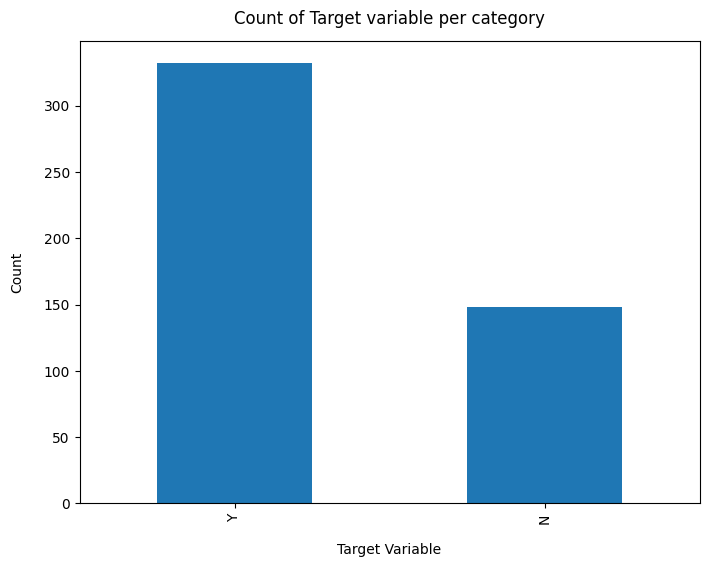

In [ ]:
df['Loan_Status'].value_counts().plot(kind='bar',figsize=(8,6))
plt.ylabel("Count",labelpad=14)
plt.xlabel("Target Variable",labelpad=14)
plt.title("Count of Target variable per category",y=1.02)

<Axes: xlabel='Education', ylabel='count'>

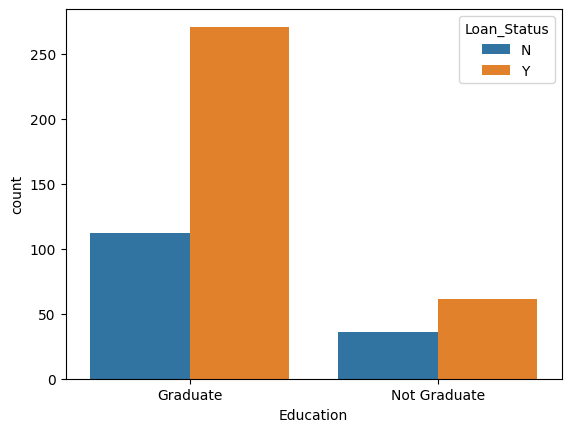

In [ ]:
sns.countplot(x='Education',hue='Loan_Status',data=df)

<Axes: xlabel='Married', ylabel='count'>

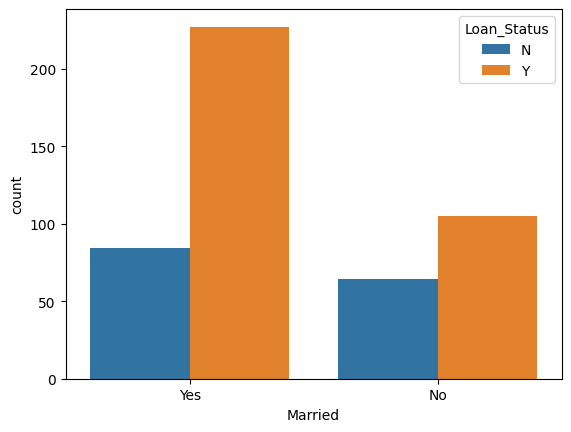

In [ ]:
sns.countplot(x='Married',hue='Loan_Status',data=df)

<Axes: xlabel='Credit_History', ylabel='count'>

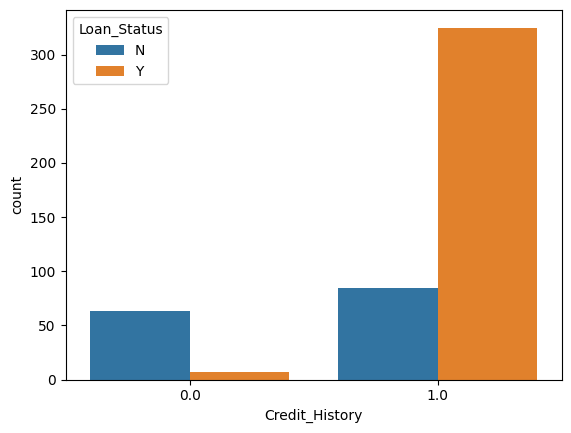

In [ ]:
sns.countplot(x='Credit_History',hue='Loan_Status',data=df)

<Axes: xlabel='Property_Area', ylabel='count'>

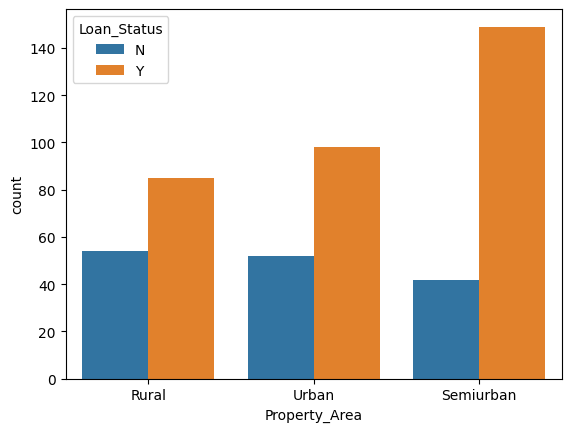

In [ ]:
sns.countplot(x='Property_Area',hue='Loan_Status',data=df)

<Axes: xlabel='Dependents', ylabel='count'>

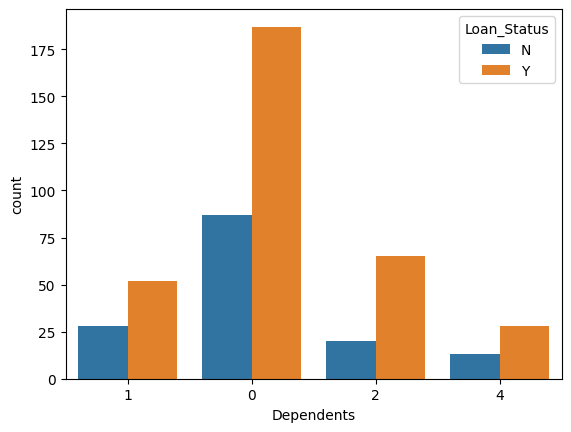

In [ ]:
sns.countplot(x='Dependents',hue='Loan_Status',data=df)

<Axes: xlabel='Self_Employed', ylabel='count'>

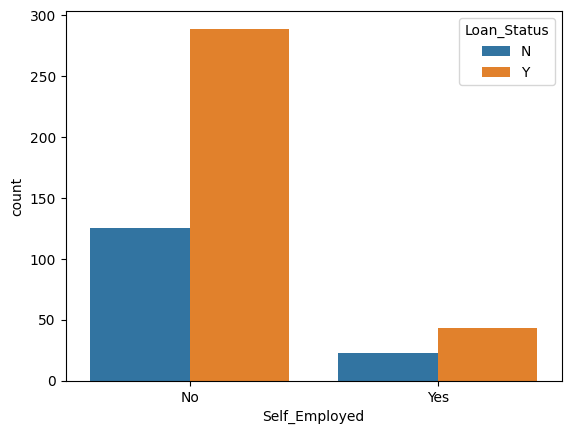

In [ ]:
sns.countplot(x='Self_Employed',hue='Loan_Status',data=df)

In [ ]:
df['Total_Income']=df['ApplicantIncome']+df['CoapplicantIncome']
df.drop(columns=['ApplicantIncome','CoapplicantIncome'],inplace=True)

In [ ]:
df.head(3)

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
1,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,120.0,360.0,1.0,Urban,Y,4941.0


In [ ]:
df.sample(3)

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
84,Male,Yes,1,Graduate,No,50.0,240.0,1.0,Urban,Y,3988.0
90,Male,Yes,0,Graduate,No,131.0,360.0,1.0,Semiurban,Y,5858.0
331,Male,No,0,Graduate,No,98.0,360.0,1.0,Semiurban,Y,2935.0


In [ ]:
df['Loan_Status']=np.where(df.Loan_Status=='Y',1,0)

In [ ]:
df.sample(3)

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
585,Male,Yes,1,Graduate,No,172.0,84.0,1.0,Rural,0,7283.0
108,Male,Yes,2,Graduate,No,216.0,360.0,0.0,Urban,0,7400.0
555,Male,Yes,1,Graduate,No,26.0,360.0,1.0,Semiurban,1,6500.0


In [ ]:
df=pd.get_dummies(df,drop_first=True)

In [ ]:
df.head(5)

,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Total_Income,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_4,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
1,128.0,360.0,1.0,0,6091.0,True,True,True,False,False,False,False,False,False
2,66.0,360.0,1.0,1,3000.0,True,True,False,False,False,False,True,False,True
3,120.0,360.0,1.0,1,4941.0,True,True,False,False,False,True,False,False,True
4,141.0,360.0,1.0,1,6000.0,True,False,False,False,False,False,False,False,True
5,267.0,360.0,1.0,1,9613.0,True,True,False,True,False,False,True,False,True


In [ ]:
df.shape

(480, 14)

<Axes: >

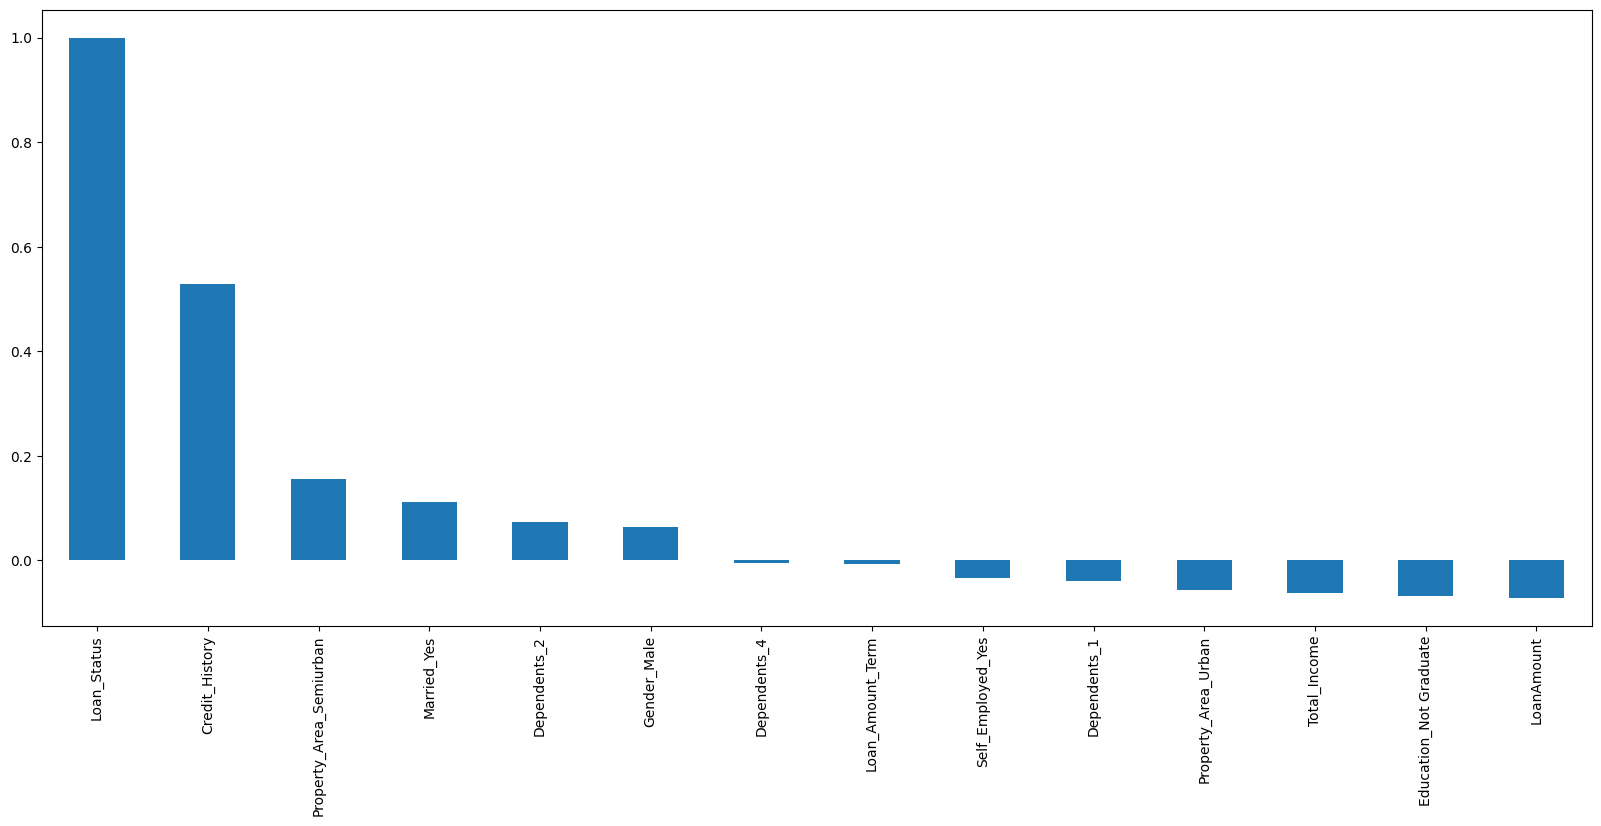

In [ ]:
plt.figure(figsize=(20,8))
df.corr()['Loan_Status'].sort_values(ascending = False).plot(kind='bar')


<Axes: >

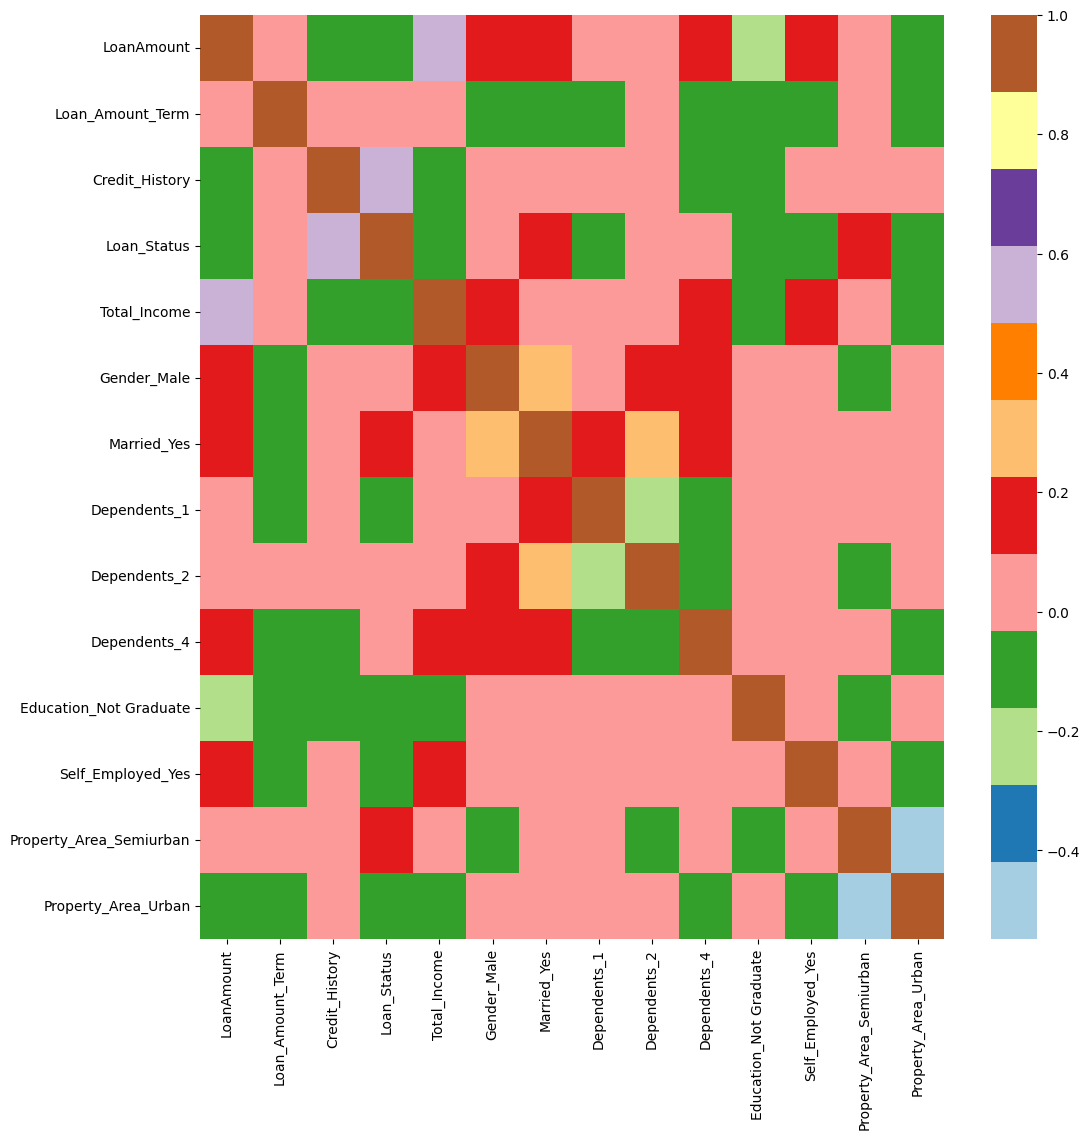

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), cmap="Paired")


In [ ]:
x=df.drop('Loan_Status',axis=1)

In [ ]:
y=df['Loan_Status']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


In [ ]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN


In [ ]:
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)


In [ ]:
model_dt.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [ ]:
y_pred=model_dt.predict(x_test)
y_pred


array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
model_dt.score(x_test,y_test)


0.7708333333333334

In [ ]:
print(classification_report(y_test, y_pred, labels=[0,1]))


              precision    recall  f1-score   support

           0       0.71      0.41      0.52        29
           1       0.78      0.93      0.85        67

    accuracy                           0.77        96
   macro avg       0.75      0.67      0.69        96
weighted avg       0.76      0.77      0.75        96



In [ ]:
print(confusion_matrix(y_test, y_pred))


[[12 17]
 [ 5 62]]


In [ ]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x,y)


In [ ]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)


In [ ]:
model_dt_smote=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)


In [ ]:
model_dt_smote.fit(xr_train,yr_train)
yr_predict = model_dt_smote.predict(xr_test)
model_score_r = model_dt_smote.score(xr_test, yr_test)
print(model_score_r)
print(metrics.classification_report(yr_test, yr_predict))

0.8043478260869565
              precision    recall  f1-score   support

           0       0.90      0.72      0.80        25
           1       0.73      0.90      0.81        21

    accuracy                           0.80        46
   macro avg       0.82      0.81      0.80        46
weighted avg       0.82      0.80      0.80        46



In [ ]:
print(metrics.confusion_matrix(yr_test, yr_predict))


[[18  7]
 [ 2 19]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)


In [ ]:
model_rf.fit(x_train,y_train)


RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [ ]:
y_pred=model_rf.predict(x_test)


In [ ]:
model_rf.score(x_test,y_test)


0.8229166666666666

In [ ]:
print(classification_report(y_test, y_pred, labels=[0,1]))


              precision    recall  f1-score   support

           0       1.00      0.41      0.59        29
           1       0.80      1.00      0.89        67

    accuracy                           0.82        96
   macro avg       0.90      0.71      0.74        96
weighted avg       0.86      0.82      0.80        96



In [ ]:
sm = SMOTEENN()
X_resampled1, y_resampled1 = sm.fit_resample(x,y)


In [ ]:
xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(X_resampled1, y_resampled1,test_size=0.2)


In [ ]:
model_rf_smote=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)


In [ ]:
model_rf_smote.fit(xr_train1,yr_train1)


RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [ ]:
yr_predict1 = model_rf_smote.predict(xr_test1)


In [ ]:
model_score_r1 = model_rf_smote.score(xr_test1, yr_test1)


In [ ]:
print(model_score_r1)
print(metrics.classification_report(yr_test1, yr_predict1))


0.8
              precision    recall  f1-score   support

           0       0.95      0.72      0.82        25
           1       0.67      0.93      0.78        15

    accuracy                           0.80        40
   macro avg       0.81      0.83      0.80        40
weighted avg       0.84      0.80      0.80        40



In [ ]:
print(metrics.confusion_matrix(yr_test1, yr_predict1))


[[18  7]
 [ 1 14]]


NEXT PHASE

In [ ]:
x_train.shape

(432, 13)

In [ ]:
x_test.shape

(48, 13)

In [ ]:
from sklearn import svm

In [ ]:
svm_class = svm.SVC(kernel='linear')

In [ ]:
svm_class.fit(x_train,y_train)

SVC(kernel='linear')

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
y_prediction = svm_class.predict(x_test)
testing_data_accuray = accuracy_score(y_prediction,y_test)

In [ ]:
print('Accuracy on testing data : ', testing_data_accuray)

Accuracy on testing data :  0.7083333333333334


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_class=DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)

In [ ]:

dt_class.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred=dt_class.predict(x_test)

In [ ]:
y_pred=dt_class.predict(x_test)
test_data_accuray = accuracy_score(y_pred,y_test)

In [ ]:
print('Accuracy on test data : ', test_data_accuray)

Accuracy on test data :  0.7291666666666666


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_class=RandomForestClassifier()
rf_class.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
from sklearn import metrics
y_pd=rf_class.predict(x_test)

In [ ]:
test_data_accuray = accuracy_score(y_pd,y_test)

In [ ]:
print('Accuracy on test data : ', test_data_accuray)

Accuracy on test data :  0.8125


In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
kn_class=KNeighborsClassifier()

In [ ]:
kn_class.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred_kn=kn_class.predict(x_test)

In [ ]:
test_data_accuray = accuracy_score(y_pred_kn,y_test)

In [ ]:
print('Accuracy on test data : ', test_data_accuray)

Accuracy on test data :  0.7083333333333334
